In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_text

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Forecasting_Project/Tomato_Disease.csv')

In [4]:
# Data Exploration
print("Dataset Info:")
data.info()
print("\nSummary Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        500 non-null    int64  
 1   Leaf_Spot_Size    500 non-null    float64
 2   Leaf_Color_Index  500 non-null    float64
 3   Temperature       500 non-null    float64
 4   Humidity          500 non-null    float64
 5   Disease           500 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 23.6+ KB

Summary Statistics:
       Unnamed: 0  Leaf_Spot_Size  Leaf_Color_Index  Temperature    Humidity
count  500.000000      500.000000        500.000000   500.000000  500.000000
mean   249.500000        5.006838         50.159131    22.216969   60.165940
std    144.481833        0.981253          4.889986     2.020493    4.920331
min      0.000000        1.758733         36.515567    16.207489   45.298057
25%    124.750000        4.299693    

In [5]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Unnamed: 0          0
Leaf_Spot_Size      0
Leaf_Color_Index    0
Temperature         0
Humidity            0
Disease             0
dtype: int64


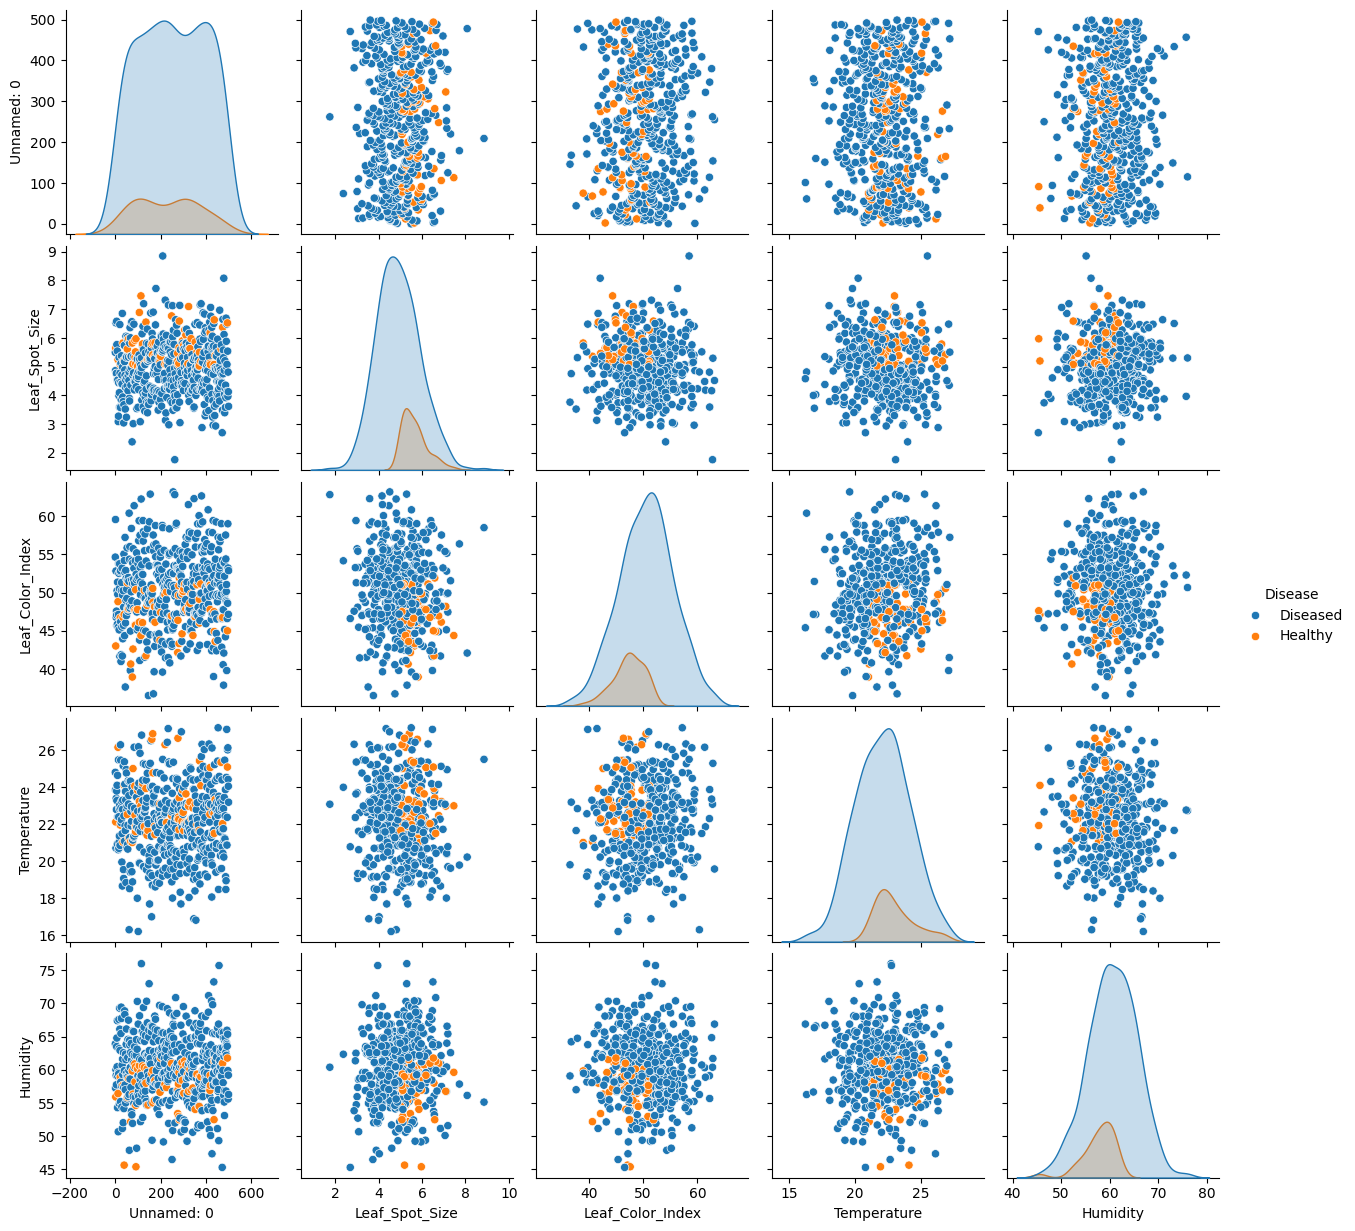

In [6]:
# Data Visualization
sns.pairplot(data, hue='Disease', diag_kind='kde')
plt.show()

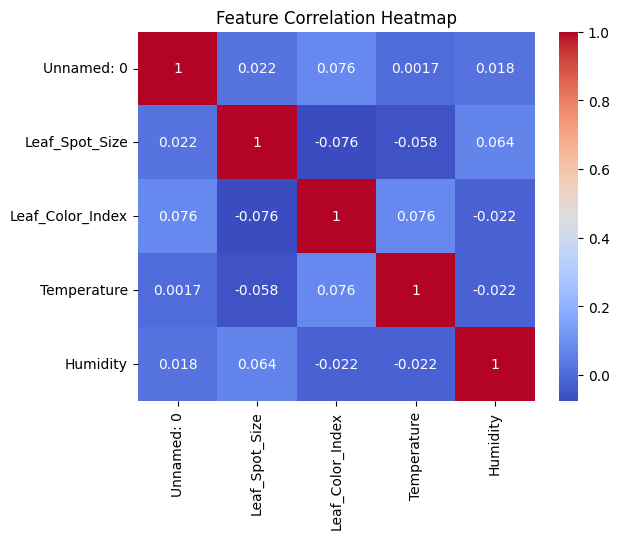

In [7]:
# Compute the correlation matrix, excluding non-numeric columns
corr_matrix = data.select_dtypes(include=['float', 'int']).corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


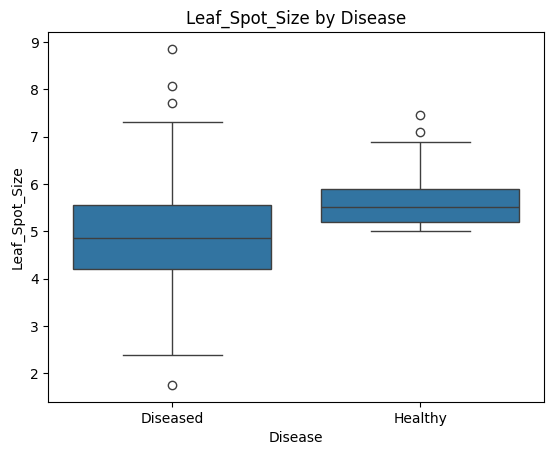

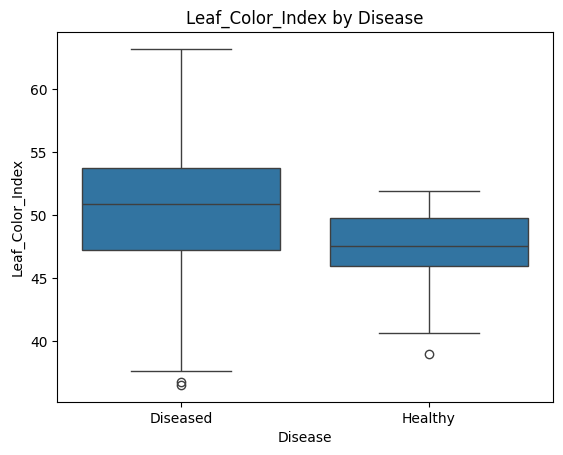

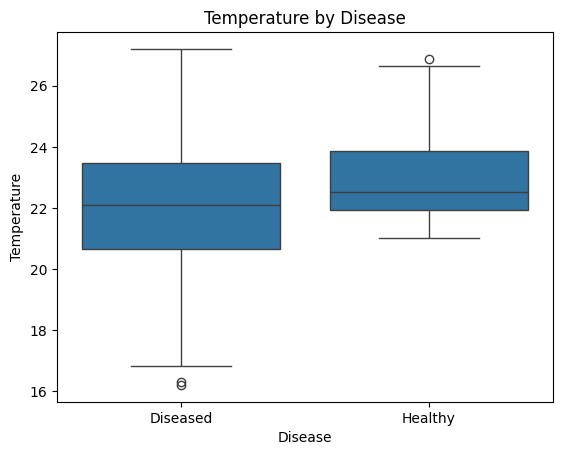

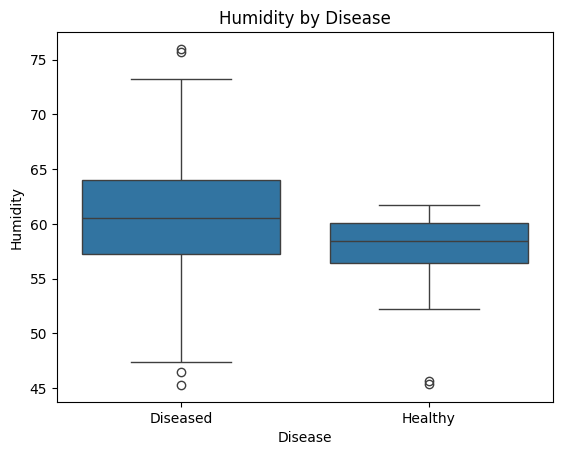

In [8]:
# Boxplots for visualizing distribution
features = ['Leaf_Spot_Size', 'Leaf_Color_Index', 'Temperature', 'Humidity']
for feature in features:
    sns.boxplot(data=data, x='Disease', y=feature)
    plt.title(f'{feature} by Disease')
    plt.show()

In [9]:
# Encode target variable
le = LabelEncoder()
data['Disease'] = le.fit_transform(data['Disease'])  # Healthy=0, Diseased=1

In [10]:
# Feature Selection and Scaling
X = data[['Leaf_Spot_Size', 'Leaf_Color_Index', 'Temperature', 'Humidity']]
y = data['Disease']

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
# Decision Tree Classifier
print("\nDecision Tree")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))


Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        82
           1       0.94      0.94      0.94        18

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100

Confusion Matrix:
[[81  1]
 [ 1 17]]


In [16]:
# Rule Induction: Extract rules from Decision Tree
rules = export_text(dt_model, feature_names=list(X.columns))
print("\nRule Induction from Decision Tree:")
print(rules)


Rule Induction from Decision Tree:
|--- Leaf_Spot_Size <= -0.01
|   |--- class: 0
|--- Leaf_Spot_Size >  -0.01
|   |--- Humidity <= 0.24
|   |   |--- Temperature <= -0.48
|   |   |   |--- Temperature <= -0.62
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  -0.62
|   |   |   |   |--- Leaf_Color_Index <= -0.03
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Leaf_Color_Index >  -0.03
|   |   |   |   |   |--- class: 0
|   |   |--- Temperature >  -0.48
|   |   |   |--- Leaf_Color_Index <= 0.37
|   |   |   |   |--- class: 1
|   |   |   |--- Leaf_Color_Index >  0.37
|   |   |   |   |--- class: 0
|   |--- Humidity >  0.24
|   |   |--- Humidity <= 0.33
|   |   |   |--- Humidity <= 0.31
|   |   |   |   |--- class: 0
|   |   |   |--- Humidity >  0.31
|   |   |   |   |--- class: 1
|   |   |--- Humidity >  0.33
|   |   |   |--- class: 0



In [17]:
# Naive Bayes Classifier
print("\nNaive Bayes")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print(classification_report(y_test, nb_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_pred))


Naive Bayes
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        82
           1       1.00      0.22      0.36        18

    accuracy                           0.86       100
   macro avg       0.93      0.61      0.64       100
weighted avg       0.88      0.86      0.82       100

Confusion Matrix:
[[82  0]
 [14  4]]


In [18]:
# Neural Network Classifier
print("\nNeural Network")
nn_model = MLPClassifier(random_state=42, max_iter=1000)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
print(classification_report(y_test, nn_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nn_pred))


Neural Network
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        82
           1       0.88      0.78      0.82        18

    accuracy                           0.94       100
   macro avg       0.91      0.88      0.89       100
weighted avg       0.94      0.94      0.94       100

Confusion Matrix:
[[80  2]
 [ 4 14]]
